# Time Series Prediction 

This notebook will be dedicated to stock price prediction 

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
# OS
from pathlib import Path
import os

In [11]:

folder_path = "stock-price-predictions/price/"
chosen_company = "AAPL"
dataframes = {}

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dataframes[filename[:-4]] = df

for name, df in dataframes.items():
    print(f"Loaded {name}: {df.shape}")


Loaded AAPL: (1258, 7)
Loaded ABB: (1258, 7)
Loaded ABBV: (1177, 7)
Loaded AEP: (1258, 7)
Loaded AGFS: (701, 7)
Loaded AMGN: (1258, 7)
Loaded AMZN: (1258, 7)
Loaded BA: (1258, 7)
Loaded BABA: (745, 7)
Loaded BAC: (1258, 7)
Loaded BBL: (1258, 7)
Loaded BCH: (1258, 7)
Loaded BHP: (1258, 7)
Loaded BP: (1258, 7)
Loaded BRK-A: (1258, 7)
Loaded BSAC: (1258, 7)
Loaded BUD: (1258, 7)
Loaded C: (1258, 7)
Loaded CAT: (1258, 7)
Loaded CELG: (1258, 7)
Loaded CHL: (1258, 7)
Loaded CHTR: (1258, 7)
Loaded CMCSA: (1258, 7)
Loaded CODI: (1258, 7)
Loaded CSCO: (1258, 7)
Loaded CVX: (1258, 7)
Loaded D: (1258, 7)
Loaded DHR: (1258, 7)
Loaded DIS: (1258, 7)
Loaded DUK: (1258, 7)
Loaded EXC: (1258, 7)
Loaded FB: (1258, 7)
Loaded GD: (1258, 7)
Loaded GE: (1258, 7)
Loaded GMRE: (297, 7)
Loaded GOOG: (1258, 7)
Loaded HD: (1258, 7)
Loaded HON: (1258, 7)
Loaded HRG: (1258, 7)
Loaded HSBC: (1258, 7)
Loaded IEP: (1258, 7)
Loaded INTC: (1258, 7)
Loaded JNJ: (1258, 7)
Loaded JPM: (1258, 7)
Loaded KO: (1258, 7)
Loade

In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-09-04,27.327276,27.606695,27.243450,27.578754,21.952684,13438500
1,2012-09-05,27.653267,27.755720,27.476299,27.606695,21.974926,6460300
2,2012-09-06,27.392473,27.392473,27.150311,27.206194,21.922386,5406200
3,2012-09-07,27.252764,27.336590,27.140995,27.234137,21.944904,2729500
4,2012-09-10,27.327276,27.327276,27.131681,27.131681,21.862347,2729300
...,...,...,...,...,...,...,...
1253,2017-08-28,39.610001,39.680000,39.299999,39.529999,39.529999,2119900
1254,2017-08-29,39.590000,39.650002,39.360001,39.380001,39.380001,1443900
1255,2017-08-30,39.270000,39.419998,39.110001,39.180000,39.180000,1825100
1256,2017-08-31,39.259998,39.320000,39.169998,39.240002,39.240002,2086200


In [10]:

folder_path = 'stock-price-predictions/price/'

volatility_dict = {}

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        if {'High', 'Low', 'Close'}.issubset(df.columns):
            df['Volatility'] = df['Close'].std()
            #df['Volatility'] = (df['High'] - df['Low']) / df['Close']
            avg_volatility = df['Volatility'].mean()
            volatility_dict[filename[:-4]] = avg_volatility

sorted_volatility = sorted(volatility_dict.items(), key=lambda x: x[1], reverse=True)

for stock, vol in sorted_volatility:
    print(f"{stock}: {vol:.5f}")


BRK-A: 33823.27304
PCLN: 327.81740
AMZN: 234.49625
GOOG: 164.42096
CHTR: 78.33777
LMT: 59.73121
FB: 40.25637
UNH: 39.06597
GD: 38.67045
BA: 32.94518
MMM: 30.64895
HD: 28.84244
AMGN: 28.15103
CELG: 26.96468
PTR: 26.80493
AAPL: 25.76712
REX: 24.39223
IEP: 22.96054
BABA: 22.57322
MA: 21.00870
NEE: 20.34242
DIS: 20.00740
HON: 18.97971
V: 17.69743
MCD: 17.38828
BHP: 17.21948
JNJ: 16.08153
BBL: 15.64786
MDT: 13.76360
MO: 13.69414
TM: 13.36761
SRE: 13.07403
DHR: 13.01577
JPM: 12.94966
PEP: 12.76380
CVX: 12.45644
MSFT: 12.43517
BUD: 12.42005
CAT: 11.85779
UTX: 11.68321
NVS: 11.23771
SLB: 11.16909
RDS-B: 11.07431
UPS: 10.79303
PM: 10.19438
SNP: 9.77833
BCH: 9.61492
ABBV: 9.12106
PCG: 8.74342
AEP: 8.54496
D: 7.69747
HSBC: 7.56990
C: 7.20688
WFC: 6.91445
XOM: 6.81195
TOT: 6.78000
NGG: 6.67582
MRK: 6.57171
DUK: 6.35012
CMCSA: 5.96339
PG: 5.92297
WMT: 5.91624
BP: 5.89641
TSM: 5.66369
CHL: 5.40105
INTC: 5.37458
PICO: 5.10775
SNY: 4.92004
UN: 4.85781
ORCL: 4.52742
UL: 4.38881
CSCO: 4.06528
BAC: 3.776

In [60]:
# Merging sentiment analysis 

file_path = 'stock-price-predictions/tweet/AAPL/daily_tweet_sentiment.csv'
sentiment = pd.read_csv(file_path)

stock_senti = aapl_data.merge(sentiment, how = 'left', left_on='Date', right_on='day')
stock_senti

,Date,Open,High,Low,Close,Adj Close,Volume,pct,day,sentiment_number
0,2012-09-04,95.108574,96.448570,94.928574,96.424286,87.121140,91973000,0.920245,NaN,NaN
1,2012-09-05,96.510002,96.621429,95.657143,95.747147,86.509338,84093800,-0.168414,NaN,NaN
2,2012-09-06,96.167145,96.898575,95.828575,96.610001,87.288956,97799100,-0.680037,NaN,NaN
3,2012-09-07,96.864288,97.497147,96.538574,97.205711,87.827171,82416600,-0.068349,NaN,NaN
4,2012-09-10,97.207146,97.612854,94.585716,94.677139,85.542564,121999500,-0.715750,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1253,2017-08-28,160.139999,162.000000,159.929993,161.470001,161.470001,25966000,-0.201974,NaN,NaN
1254,2017-08-29,160.100006,163.119995,160.000000,162.910004,162.910004,29516900,-0.530434,NaN,NaN
1255,2017-08-30,163.800003,163.889999,162.610001,163.350006,163.350006,27269600,-0.229183,NaN,NaN
1256,2017-08-31,163.639999,164.520004,163.479996,164.000000,164.000000,26785100,-0.050932,NaN,NaN


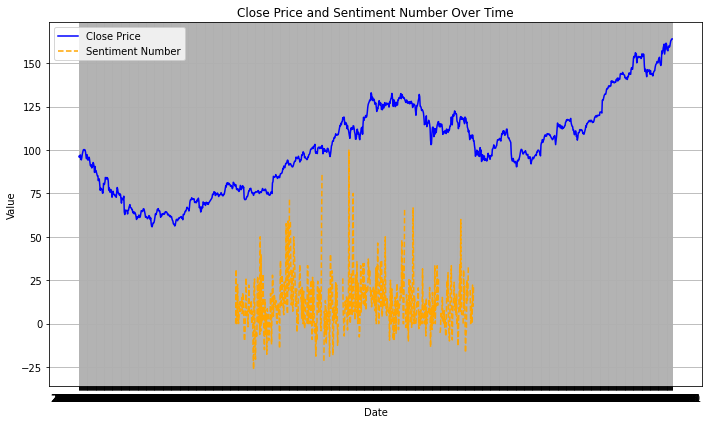

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting the Close Price and Sentiment Number
plt.figure(figsize=(10, 6))

# Plot Close Price
plt.plot(stock_senti['Date'], stock_senti['Close'], label='Close Price', color='blue')

# Plot Sentiment Number
plt.plot(stock_senti['Date'], stock_senti['sentiment_number']*100, label='Sentiment Number', color='orange', linestyle='--')

# Add labels and title
plt.title('Close Price and Sentiment Number Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
